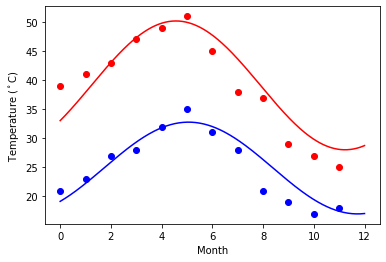

In [6]:
"""Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below."""

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# fitting it to the perioodic function
# defining periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)


# identifying the curve for plot using scipy
res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

# plot the fit.
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()



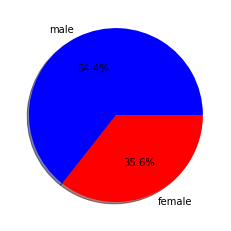

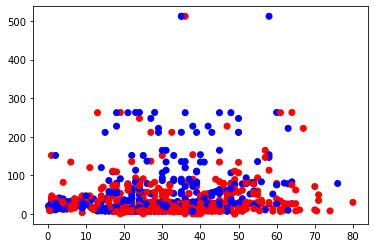

In [30]:
"""Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
data.head(5)

# Create a pie chart presenting the male/female proportion
s= round((data['sex'].value_counts())/len(data)*100,2)
pd.DataFrame(s)

labels = ['male','female']
sizes = data.sex.value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors = ['Blue', 'Red'])
plt.show()

# Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
url= "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url, skipfooter=1, engine='python')
colors = {'male':'red', 'female':'blue'}
fig2, ax2 = plt.subplots()
ax2.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: colors[x]))
